# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with each city
city_url = f"{base_url}q={city}&appid={weather_api_key}&units=imperial"

# Log the url, record, and set numbers
print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

Processing Record 1 of Set 1 | vila franca do campo


In [22]:
# Set the API base URL
url = http://api.openweathermap.org/data/2.5/weather?

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
              # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Object `weather` not found.
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | ust-nera
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | north shore
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | sittwe
Processing Record 11 of Set 1 | bratsk
Processing Record 12 of Set 1 | orumiyeh
Processing Record 13 of Set 1 | kununurra
Processing Record 14 of Set 1 | jose bonifacio
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | callao
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | yagry
City not found. Skipping...
Processing Record 21 of Set 1 | puerto natales

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.7167,-25.4333,64.89,99,100,7.20,PT,1713806860
1,adamstown,-25.0660,-130.1015,72.66,74,78,26.98,PN,1713806860
2,isafjordur,66.0755,-23.1240,42.84,75,0,3.44,IS,1713806860
3,ust-nera,64.5667,143.2000,20.57,100,98,3.04,RU,1713806860
4,hamilton,39.1834,-84.5333,62.74,34,0,4.61,US,1713806412


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/hansgrice/Desktop/output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("/Users/hansgrice/Desktop/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,64.89,99,100,7.20,PT,1713806860
1,adamstown,-25.0660,-130.1015,72.66,74,78,26.98,PN,1713806860
2,isafjordur,66.0755,-23.1240,42.84,75,0,3.44,IS,1713806860
3,ust-nera,64.5667,143.2000,20.57,100,98,3.04,RU,1713806860
4,hamilton,39.1834,-84.5333,62.74,34,0,4.61,US,1713806412


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

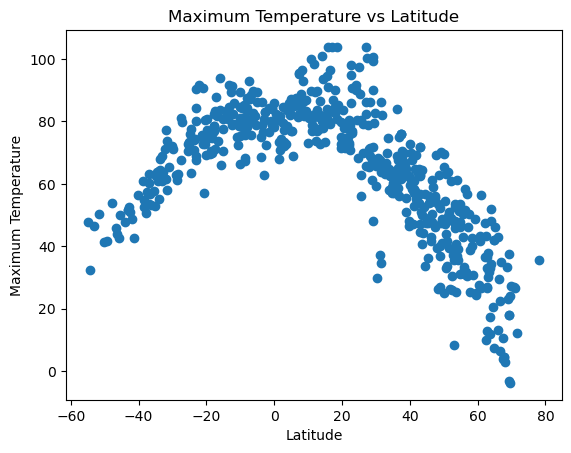

In [29]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(lat, max_temp)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature vs Latitude')

# Save the figure
plt.savefig("/Users/hansgrice/Desktop/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

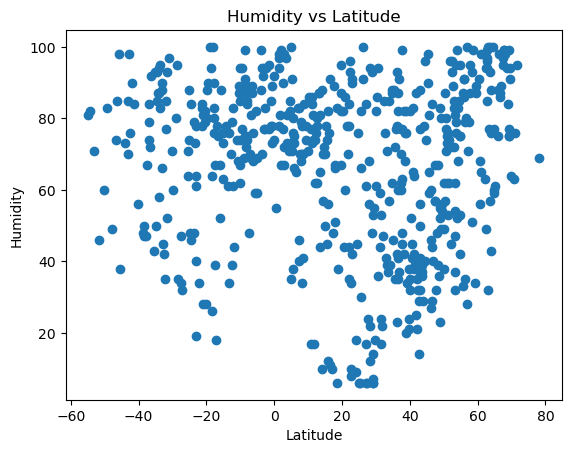

In [30]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
max_temp = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(lat, max_temp)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs Latitude')

# Save the figure
plt.savefig("/Users/hansgrice/Desktop/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

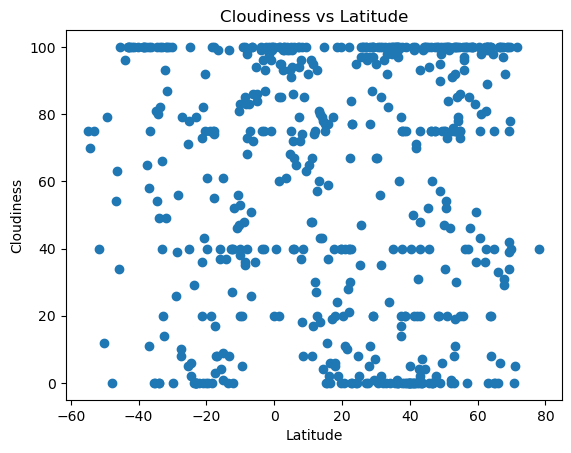

In [31]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
max_temp = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(lat, max_temp)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude')

# Save the figure
plt.savefig("/Users/hansgrice/Desktop/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

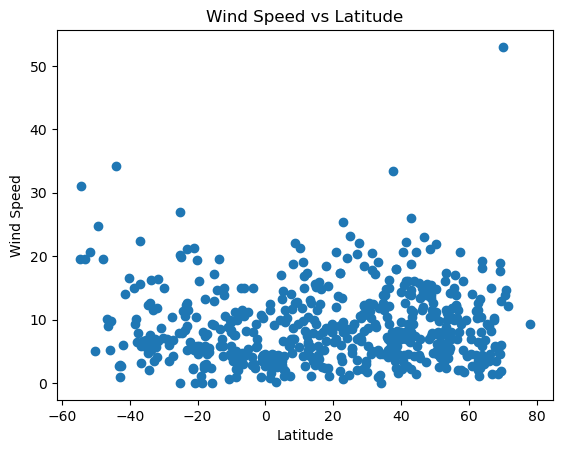

In [32]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
max_temp = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(lat, max_temp)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Latitude')

# Save the figure
plt.savefig("/Users/hansgrice/Desktop/output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def linreg_plot(df, x_col, y_col):
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])

    # Create a scatter plot
    plt.scatter(df[x_col], df[y_col], color='blue')

    # Add a regression line
    plt.plot(df[x_col], intercept + slope * df[x_col], color='red')

    # Add axis labels and title
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Linear Regression Plot of {y_col} vs {x_col}")

    # Show the plot
    plt.show()


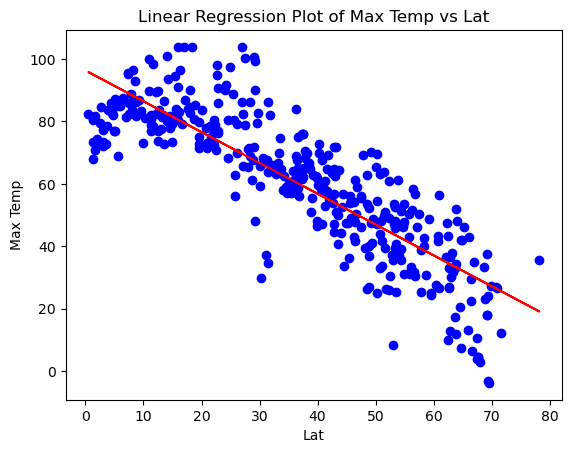

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,64.89,99,100,7.20,PT,1713806860
2,isafjordur,66.0755,-23.1240,42.84,75,0,3.44,IS,1713806860
3,ust-nera,64.5667,143.2000,20.57,100,98,3.04,RU,1713806860
4,hamilton,39.1834,-84.5333,62.74,34,0,4.61,US,1713806412
5,iqaluit,63.7506,-68.5145,17.33,57,20,10.36,CA,1713806860


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Create a Linear Regression plot of Max Temp vs Latitude
linreg_plot(northern_hemi_df, 'Lat', 'Max Temp')
# Display sample data
northern_hemi_df.head()

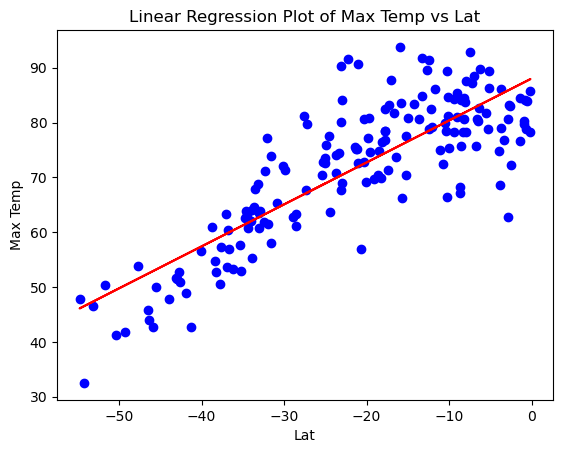

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,72.66,74,78,26.98,PN,1713806860
6,north shore,-36.8000,174.7500,60.35,74,11,3.09,NZ,1713806860
7,port-aux-francais,-49.3500,70.2167,41.81,83,79,24.81,TF,1713806861
12,kununurra,-15.7667,128.7333,66.18,88,4,0.00,AU,1713806862
13,jose bonifacio,-21.0528,-49.6883,90.66,28,0,5.21,BR,1713806862


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Create a Linear Regression plot of Max Temp vs Latitude
linreg_plot(southern_hemi_df, 'Lat', 'Max Temp')
# Display sample data
southern_hemi_df.head()
# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

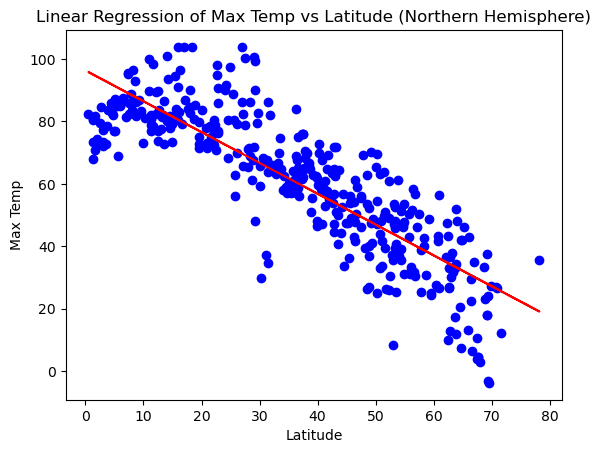

R-value: -0.850366764440186


In [51]:
# Linear regression on Northern Hemisphere

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Calculate the linear regression
result = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Create a scatter plot of the data
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='blue')

# Add a linear regression line
plt.plot(northern_hemi_df['Lat'], result.intercept + result.slope * northern_hemi_df['Lat'], color='red')

# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression of Max Temp vs Latitude (Northern Hemisphere)')

# Show the plot
plt.show()

# Print the r-value
print('R-value:', result.rvalue)

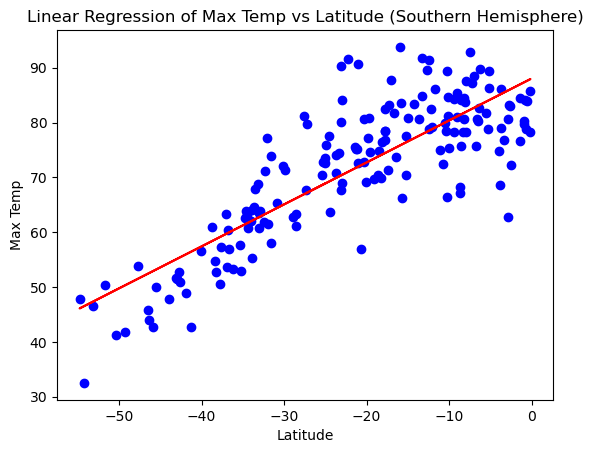

R-value: 0.8272738583448034


In [54]:
# Extract the Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Calculate the linear regression
result = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Create a scatter plot of the data
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='blue')

# Add a linear regression line
plt.plot(southern_hemi_df['Lat'], result.intercept + result.slope * southern_hemi_df['Lat'], color='red')

# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear Regression of Max Temp vs Latitude (Southern Hemisphere)')

# Show the plot
plt.show()

# Print the r-value
print('R-value:', result.rvalue)

**Discussion about the linear relationship:** the r-value for the Northern Hemisphere is -0.85, which means that this is a strong negative correlation between latitude and max temp. As the latitude increases, the maximum temperature decreases. This is not surprising, as the Northern Hemisphere includes regions with cold climates, such as the Arctic. On the other hand, the r-value for the Southern Hemisphere is 0.83, which tells us there is  a strong positive correlation between latitude and max temp. This means that as the latitude increases the max temperature increases. This is also not surprising, as the Southern Hemisphere includes regions with warm climates, such as the equator.



### Humidity vs. Latitude Linear Regression Plot

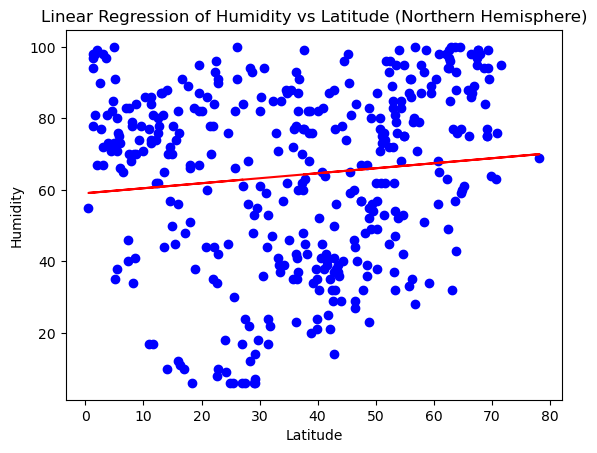

R-value: 0.10907843269095285


In [52]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Calculate the linear regression
result = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Create a scatter plot of the data
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='blue')

# Add a linear regression line
plt.plot(northern_hemi_df['Lat'], result.intercept + result.slope * northern_hemi_df['Lat'], color='red')

# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression of Humidity vs Latitude (Northern Hemisphere)')

# Show the plot
plt.show()

# Print the r-value
print('R-value:', result.rvalue)

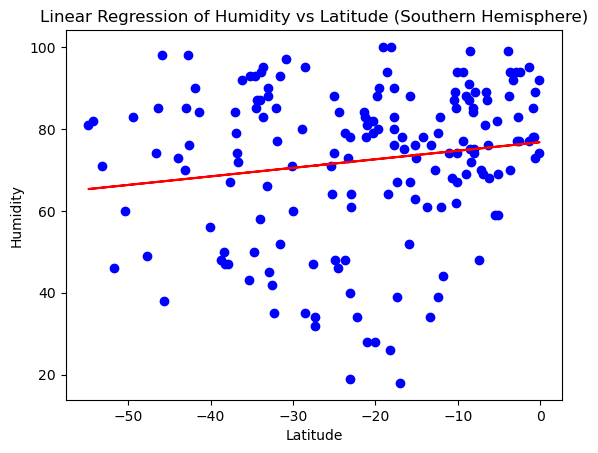

R-value: 0.15533851478298832


In [55]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Calculate the linear regression
result = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Create a scatter plot of the data
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='blue')

# Add a linear regression line
plt.plot(southern_hemi_df['Lat'], result.intercept + result.slope * southern_hemi_df['Lat'], color='red')

# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression of Humidity vs Latitude (Southern Hemisphere)')

# Show the plot
plt.show()

# Print the r-value
print('R-value:', result.rvalue)

**Discussion about the linear relationship:** The Northern Hemisphere R value being about 0.109 and the southern abou 0.155 tells us that the relationship between latitude and humidity levels is not very predictable, meaning that as latitude increases, humidity may increase slightly. There may be other factors that have a greater influence on humidity levels. For example, humidity levels may be more strongly influenced by proximity to bodies of water, wind patterns, and other weather systems. 

### Cloudiness vs. Latitude Linear Regression Plot

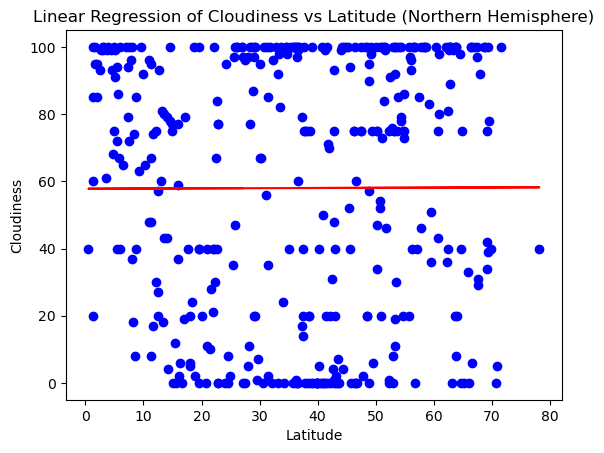

R-value: 0.002706445643507499


In [56]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Calculate the linear regression
result = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Create a scatter plot of the data
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='blue')

# Add a linear regression line
plt.plot(northern_hemi_df['Lat'], result.intercept + result.slope * northern_hemi_df['Lat'], color='red')

# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression of Cloudiness vs Latitude (Northern Hemisphere)')

# Show the plot
plt.show()

# Print the r-value
print('R-value:', result.rvalue)

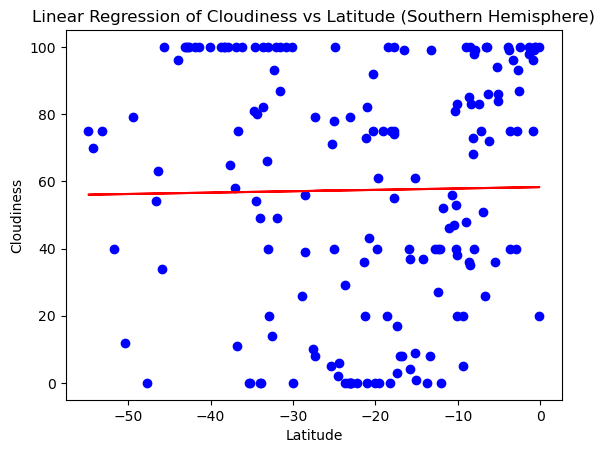

R-value: 0.015749663142880687


In [57]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Calculate the linear regression
result = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Create a scatter plot of the data
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='blue')

# Add a linear regression line
plt.plot(southern_hemi_df['Lat'], result.intercept + result.slope * southern_hemi_df['Lat'], color='red')

# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression of Cloudiness vs Latitude (Southern Hemisphere)')

# Show the plot
plt.show()

# Print the r-value
print('R-value:', result.rvalue)

**Discussion about the linear relationship:** Both of the R- Values are boh pretty unpredictable for cloudiness based on Latitude.  The Northern Hemisphere has an R-value of about 0.0027 and the Southern of about 0.0157, meaning that the Northern hemisphere stays even more unpredictable and quite all over the map with cloudiness, there is a small rise as the latitude gets less there is a small peak in cloudiness, but not by much.  We can say however, that the Northern Hemisphere is more cloudy. 

### Wind Speed vs. Latitude Linear Regression Plot

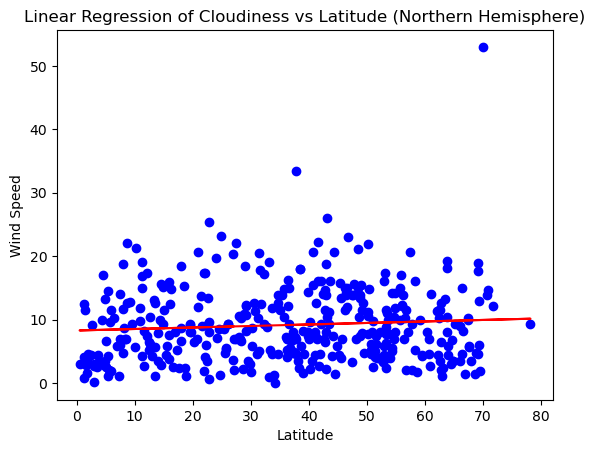

R-value: 0.07824317234772353


In [60]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Calculate the linear regression
result = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Create a scatter plot of the data
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='blue')

# Add a linear regression line
plt.plot(northern_hemi_df['Lat'], result.intercept + result.slope * northern_hemi_df['Lat'], color='red')

# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression of Cloudiness vs Latitude (Northern Hemisphere)')

# Show the plot
plt.show()

# Print the r-value
print('R-value:', result.rvalue)

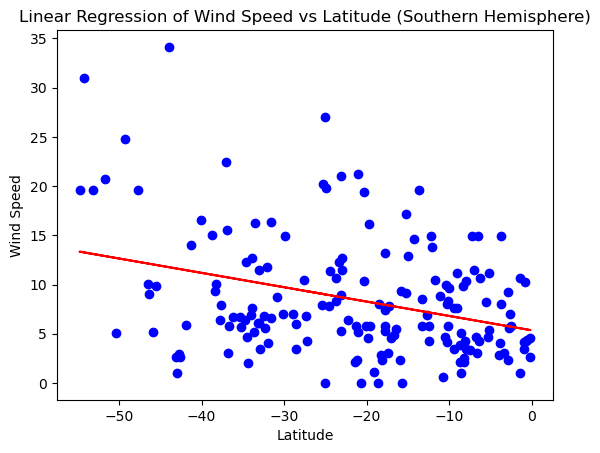

R-value: -0.33651566362369995


In [61]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Calculate the linear regression
result = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Create a scatter plot of the data
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='blue')

# Add a linear regression line
plt.plot(southern_hemi_df['Lat'], result.intercept + result.slope * southern_hemi_df['Lat'], color='red')

# Add axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression of Wind Speed vs Latitude (Southern Hemisphere)')

# Show the plot
plt.show()

# Print the r-value
print('R-value:', result.rvalue)

**Discussion about the linear relationship:** Off the bat, the Northern hemisphere is showing a weak positive correlation with an R- Value of about 0.078 while the Southern Hemisphere is a moderate negative correlation of about -0.337.  In the north wind speed increases slightly with latitude, but not much, in the South as latitude increases, wind speed decreases more significantly.  The Southern Hemisphere has more water masses increasing wind and the North has more land maybe making it more still. 